# Exercise 6: Interactivity with Slider


In [1]:
# IMPORTANT: 
# Install the package ipympl via : pip install ipympl
# Restart the jupyter lab server
%matplotlib widget

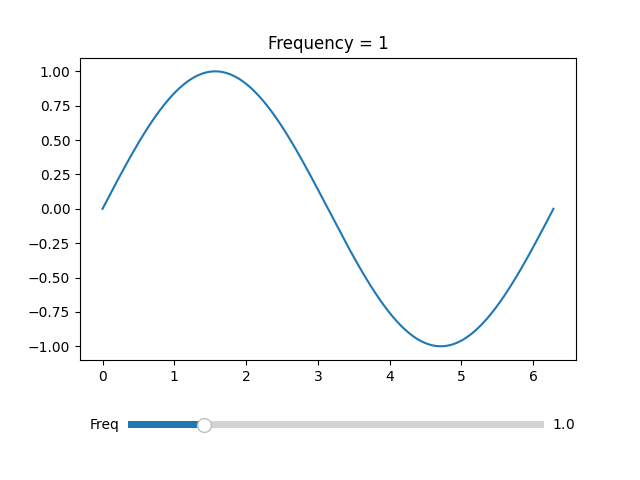

In [2]:
"""
Interactive Sine Wave with Slider Widget

This script uses matplotlib's Slider widget to create an interactive
plot of a sine wave whose frequency can be adjusted in real time.

Key Concepts:
- matplotlib.widgets.Slider
- Real-time plot updates with on_changed()
- GUI layout customization with plt.subplots_adjust()

References:
- https://matplotlib.org/stable/api/widgets_api.html#matplotlib.widgets.Slider
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# -----------------------------------------------------------------------------
# Generate X values
# -----------------------------------------------------------------------------
x = np.linspace(0, 2 * np.pi, 1000)
# np.linspace: Generate 1000 points between 0 and 2π
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

initial_freq = 1  # Initial frequency of the sine wave

# -----------------------------------------------------------------------------
# Create figure and plot
# -----------------------------------------------------------------------------
fig, ax = plt.subplots()
# plt.subplots(): Returns figure and axis objects
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

plt.subplots_adjust(bottom=0.25)
# Adjust the bottom margin to make space for the slider
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html

line, = ax.plot(x, np.sin(initial_freq * x))
# ax.plot(): Plots the initial sine wave
# Comma is used to unpack the returned Line2D object

ax.set_title(f"Frequency = {initial_freq}")
# Set dynamic title based on frequency
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

# -----------------------------------------------------------------------------
# Create slider axis and slider object
# -----------------------------------------------------------------------------
slider_ax = plt.axes([0.2, 0.1, 0.65, 0.03])
# plt.axes(): Define the position of the slider in normalized figure coordinates

slider = Slider(
    ax=slider_ax,         # The axis for the slider
    label='Freq',         # Label displayed next to the slider
    valmin=0.1,           # Minimum value
    valmax=5.0,           # Maximum value
    valinit=initial_freq  # Initial value
)
# https://matplotlib.org/stable/api/widgets_api.html#matplotlib.widgets.Slider

# -----------------------------------------------------------------------------
# Define the callback function
# -----------------------------------------------------------------------------
def update(val):
    """
    Callback function called when slider value changes.

    Parameters:
    - val: The new slider value (frequency)
    """
    freq = slider.val
    line.set_ydata(np.sin(freq * x))  # Update y-data
    ax.set_title(f"Frequency = {freq:.2f}")  # Update title
    fig.canvas.draw_idle()  # Redraw the plot efficiently
    # https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.canvas

# -----------------------------------------------------------------------------
# Connect the slider to the update function
# -----------------------------------------------------------------------------
slider.on_changed(update)
# on_changed(): Binds the update function to slider value changes
# https://matplotlib.org/stable/api/widgets_api.html#matplotlib.widgets.Slider.on_changed

# -----------------------------------------------------------------------------
# Show the interactive plot
# -----------------------------------------------------------------------------
plt.show()
# Display the full interactive plot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
